## <code> Web Scraping </code>

In [47]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
mystock = ["GBP.L", "CZN.L", "UKOG.L", "NTVO.L", "TRP.L", "CLON.L"]
stockdata= []

In [38]:
mystock = ["GBP.L", "CZN.L", "UKOG.L", "NTVO.L", "TRP.L", "CLON.L"]
stockdata= []
def getData(symbol):
    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/128.0.0.0 Safari/537.36"}
    url = f"https://uk.finance.yahoo.com/quote/{symbol}"
    respones = requests.get(url, headers= headers)
    #print(respones.status_code)
    soup = BeautifulSoup(respones.text, "html.parser")

    stock = {
    "price" : soup.find("div", {"class":"container yf-aay0dk"}).find_all("span")[0].text,
    "change" : soup.find("div", {"class":"container yf-aay0dk"}).find_all("span")[1].text,
    "change%" : soup.find("div", {"class":"container yf-aay0dk"}).find_all("span")[2].text,
    }

    return stock

In [39]:
for item in mystock:
    stockdata.append(getData(item))
    print("Getting", item)

print(stockdata)

Getting GBP.L
Getting CZN.L
Getting UKOG.L
Getting NTVO.L
Getting TRP.L
Getting CLON.L
[{'price': '0.1213', 'change': '+0.0288', 'change%': '(+31.10%)'}, {'price': '0.0418', 'change': '+0.0093', 'change%': '(+28.62%)'}, {'price': '0.0420', 'change': '+0.0005', 'change%': '(+1.20%)'}, {'price': '0.0027', 'change': '+0.0001', 'change%': '(+3.08%)'}, {'price': '0.0149', 'change': '+0.0019', 'change%': '(+14.62%)'}, {'price': '0.0597', 'change': '-0.0003', 'change%': '(-0.50%)'}]


In [35]:

print(getData("GBP.L"))
#print(getData("CLON.L"))

{'price': '0.1230', 'change': '+0.0305', 'change%': '(+32.97%)'}


In [42]:

mystock = ["GBP.L", "CZN.L", "UKOG.L", "NTVO.L", "TRP.L", "CLON.L"]
stockdata = []

def getData(symbol):
    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/128.0.0.0 Safari/537.36"}
    url = f"https://uk.finance.yahoo.com/quote/{symbol}"
    response = requests.get(url, headers=headers)
    
    # Check if request is successful
    if response.status_code != 200:
        print(f"Failed to fetch data for {symbol}")
        return None
    
    soup = BeautifulSoup(response.text, "html.parser")
    
    try:
        # Update this part based on actual Yahoo Finance HTML structure.
        price = soup.find("fin-streamer", {"data-field": "regularMarketPrice"}).text
        change = soup.find("fin-streamer", {"data-field": "regularMarketChange"}).text
        change_percent = soup.find("fin-streamer", {"data-field": "regularMarketChangePercent"}).text

        stock = {
            "symbol": symbol,
            "price": price,
            "change": change,
            "change%": change_percent
        }
        return stock
    
    except AttributeError:
        print(f"Error retrieving data for {symbol}")
        return None

# Fetching the data
for item in mystock:
    stock_info = getData(item)
    if stock_info:
        stockdata.append(stock_info)
    print(item)

# Convert to pandas DataFrame
df = pd.DataFrame(stockdata)

# Display the DataFrame
print(df)


GBP.L
CZN.L
UKOG.L
NTVO.L
TRP.L
CLON.L
   symbol   price   change    change%
0   GBP.L  0.1213  +0.0288  (+31.10%)
1   CZN.L  0.0418  +0.0093  (+28.62%)
2  UKOG.L  0.0420  +0.0005   (+1.20%)
3  NTVO.L  0.0027  +0.0001   (+3.08%)
4   TRP.L  0.0149  +0.0019  (+14.62%)
5  CLON.L  0.0597  -0.0003   (-0.50%)


C:\Users\dolla\AppData\Local\Temp\ipykernel_16128\2334596392.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="symbol", y="price", data=df, palette="viridis")


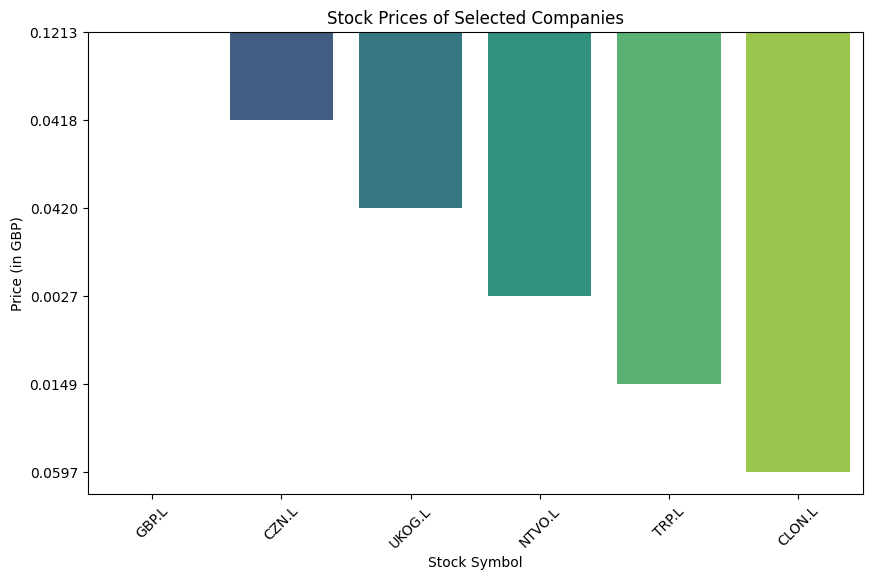

C:\Users\dolla\AppData\Local\Temp\ipykernel_16128\2334596392.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="symbol", y="change%", data=df, palette="coolwarm")


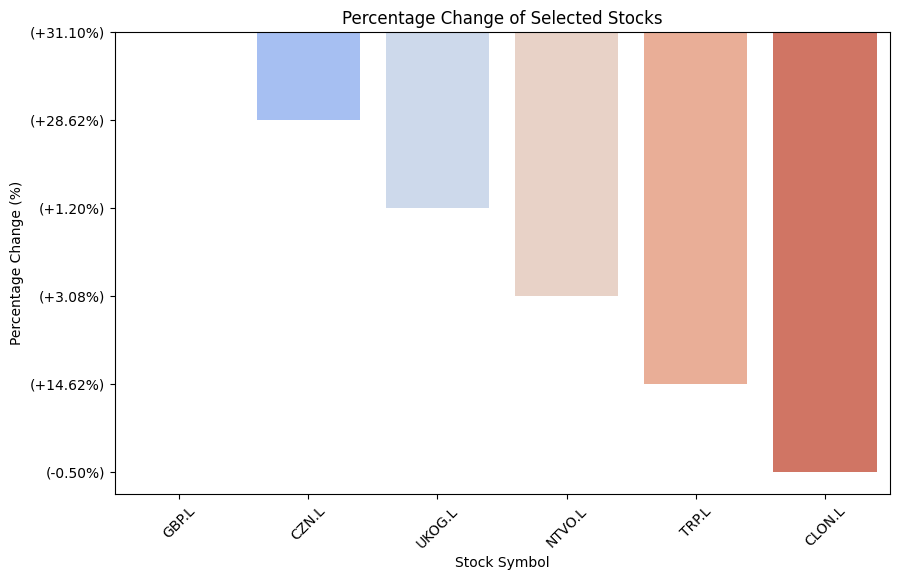

In [50]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x="symbol", y="price", data=df, palette="viridis")
plt.title("Stock Prices of Selected Companies")
plt.ylabel("Price (in GBP)")
plt.xlabel("Stock Symbol")
plt.xticks(rotation=45)
#plt.tight_layout()
plt.show()

# Additional plot for percentage change
plt.figure(figsize=(10, 6))
sns.barplot(x="symbol", y="change%", data=df, palette="coolwarm")
plt.title("Percentage Change of Selected Stocks")
plt.ylabel("Percentage Change (%)")
plt.xlabel("Stock Symbol")
plt.xticks(rotation=45)
#plt.tight_layout()
plt.show()

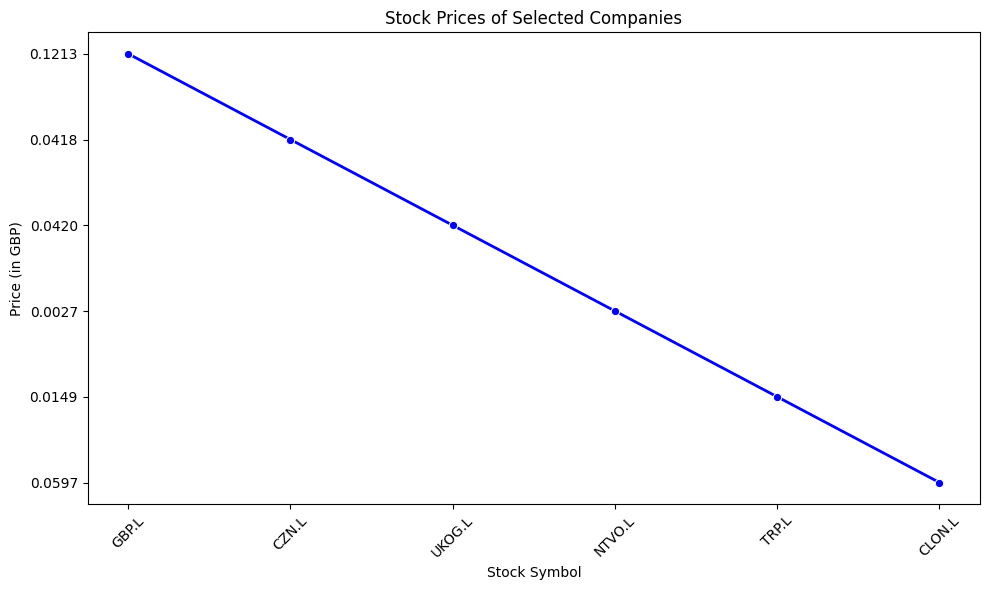

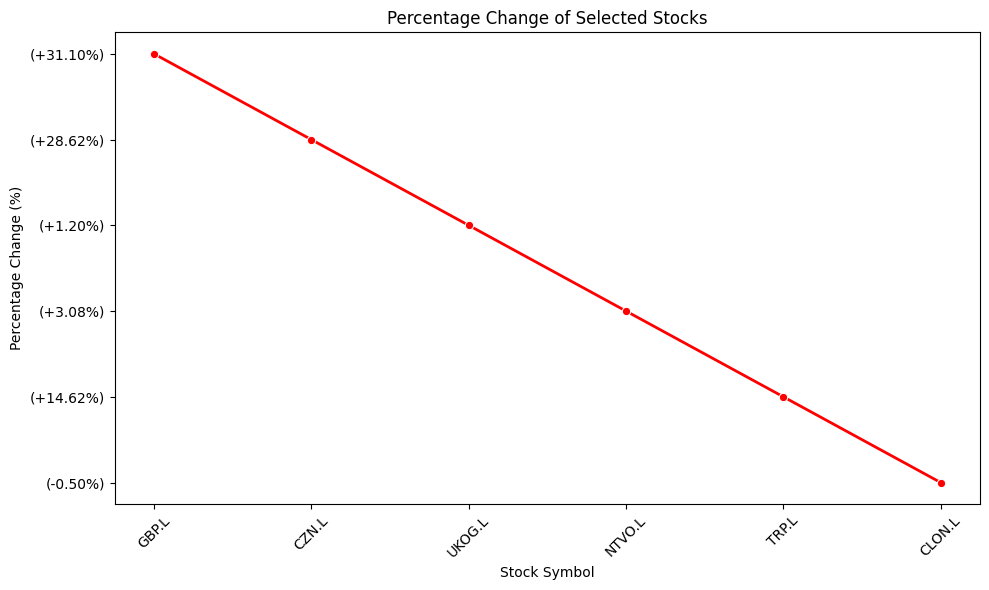

In [51]:
# Line plot for stock prices
plt.figure(figsize=(10, 6))
sns.lineplot(x="symbol", y="price", data=df, marker="o", color="b", linewidth=2)
plt.title("Stock Prices of Selected Companies")
plt.ylabel("Price (in GBP)")
plt.xlabel("Stock Symbol")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Line plot for percentage change
plt.figure(figsize=(10, 6))
sns.lineplot(x="symbol", y="change%", data=df, marker="o", color="r", linewidth=2)
plt.title("Percentage Change of Selected Stocks")
plt.ylabel("Percentage Change (%)")
plt.xlabel("Stock Symbol")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
